# Importing the relevant libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

### Importing the Database

In [42]:
raw_data = pd.read_csv('ml_datasource.csv')
data = raw_data.copy()

In [43]:
data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_country         17752 non-null  object 
 1   days_on_platform        17761 non-null  int64  
 2   minutes_watched         17761 non-null  float64
 3   courses_started         17761 non-null  int64  
 4   practice_exams_started  17761 non-null  int64  
 5   practice_exams_passed   17761 non-null  int64  
 6   minutes_spent_on_exams  17761 non-null  float64
 7   purchased               17761 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


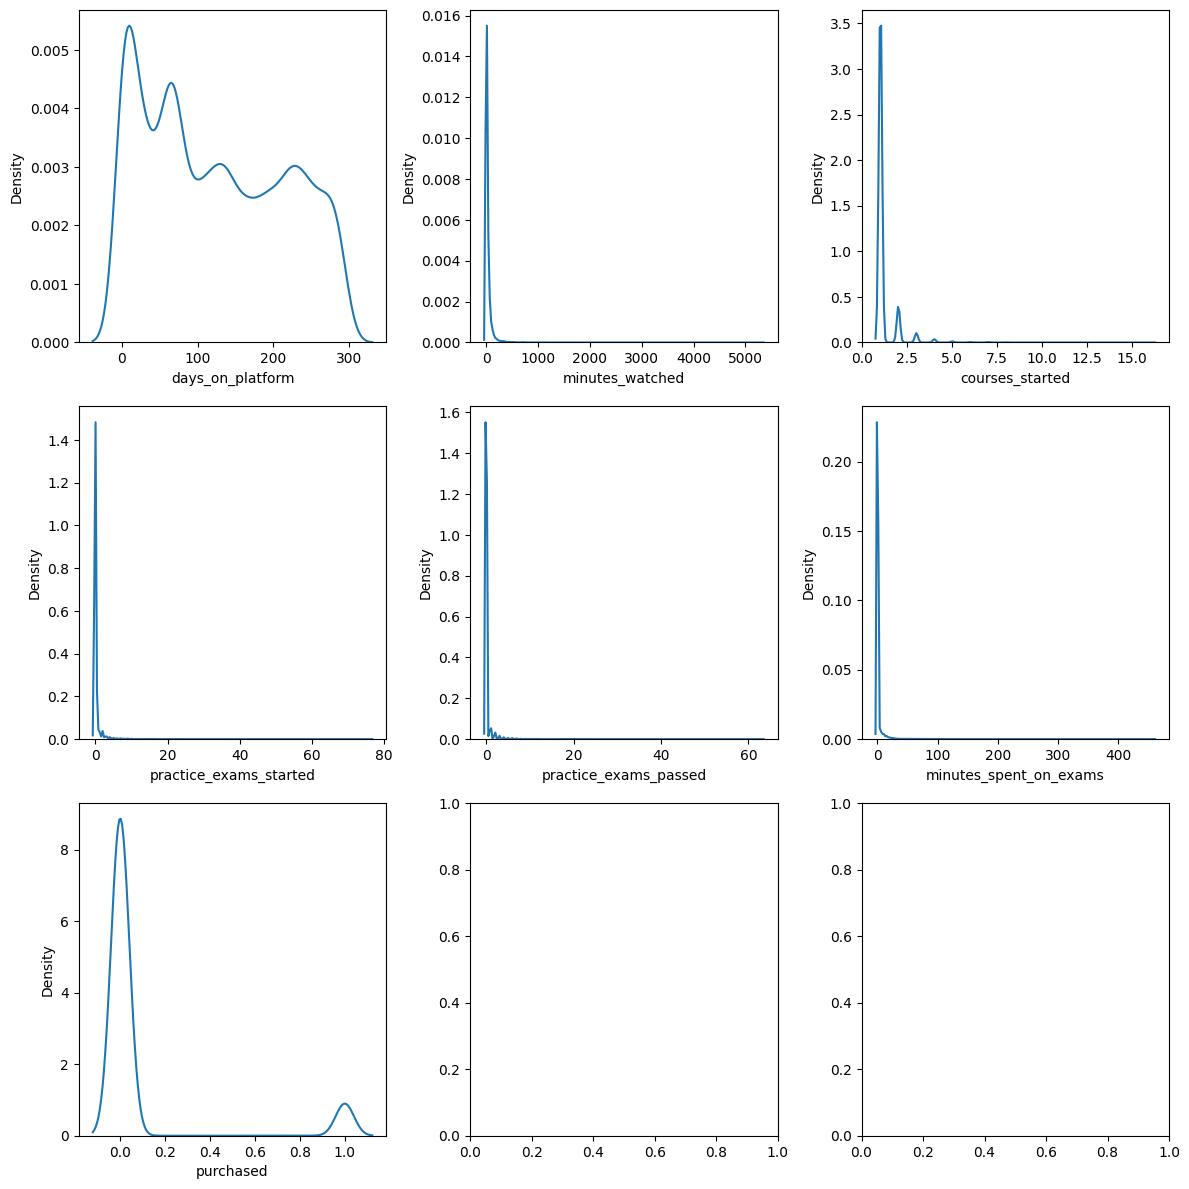

In [45]:
fig,axes = plt.subplots(3,3,figsize =(12,12))
sns.kdeplot(data= data, x = 'days_on_platform', ax =axes[0,0])
sns.kdeplot(data= data, x='minutes_watched', ax = axes[0,1])
sns.kdeplot(data= data, x='courses_started', ax = axes[0,2])
sns.kdeplot(data= data, x='practice_exams_started', ax = axes[1,0])
sns.kdeplot(data= data, x='practice_exams_passed', ax = axes[1,1])
sns.kdeplot(data= data, x='minutes_spent_on_exams', ax = axes[1,2])
sns.kdeplot(data= data, x='purchased', ax = axes[2,0])

plt.tight_layout()

### Removing Outliers

In [46]:
data_no_outliers = data[(data['minutes_watched']<=1000)&
     (data['courses_started']<=10)&
     (data['practice_exams_started']<=10)&
     (data['minutes_spent_on_exams']<=40)]

data_no_outliers.shape

(17626, 8)

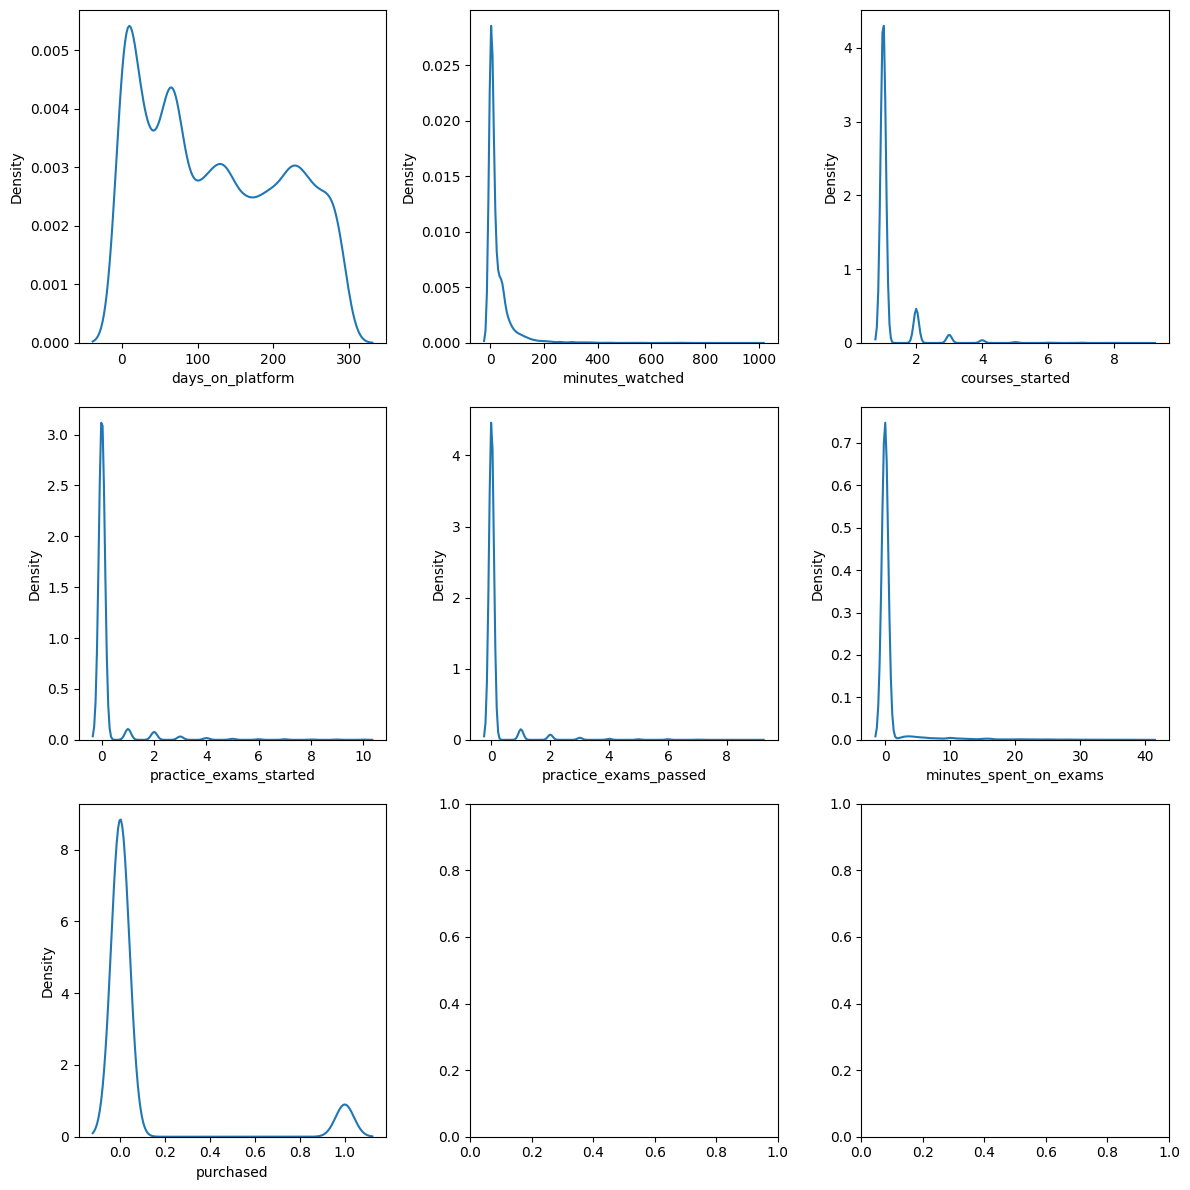

In [47]:
fig,axes = plt.subplots(3,3,figsize =(12,12))
sns.kdeplot(data= data_no_outliers, x = 'days_on_platform', ax =axes[0,0])
sns.kdeplot(data= data_no_outliers, x='minutes_watched', ax = axes[0,1])
sns.kdeplot(data= data_no_outliers, x='courses_started', ax = axes[0,2])
sns.kdeplot(data= data_no_outliers, x='practice_exams_started', ax = axes[1,0])
sns.kdeplot(data= data_no_outliers, x='practice_exams_passed', ax = axes[1,1])
sns.kdeplot(data= data_no_outliers, x='minutes_spent_on_exams', ax = axes[1,2])
sns.kdeplot(data= data_no_outliers, x='purchased', ax = axes[2,0])

plt.tight_layout()

### Checking for Multicollinearity

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
data_for_vif = data_no_outliers.drop('student_country', axis = 1)
data_for_vif.head(3)

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,288,358.1,1,2,2,15.81,0
1,260,1.7,1,1,0,16.00,0
2,260,22.4,1,1,0,0.93,0


In [50]:


def calculate_vif(df):
    x = df.assign(intercept=1)

    vif_data= pd.DataFrame(columns = ['Variable', 'VIF'])

    for i in range(x.shape[1]):
        variable = x.columns[i]
        vif_value = variance_inflation_factor(x.values, i)
        vif_data = pd.concat([vif_data, pd.DataFrame({'Variable': [variable], 'VIF': [vif_value]})], ignore_index=True)

    vif_data = vif_data[vif_data['Variable'] != 'intercept']
    return vif_data

vif_df = calculate_vif(data_for_vif)
print(vif_df)

                 Variable       VIF
0        days_on_platform  1.211302
1         minutes_watched  1.585815
2         courses_started  1.364688
3  practice_exams_started  9.744814
4   practice_exams_passed  7.523045
5  minutes_spent_on_exams  3.196568
6               purchased  1.240166


C:\Users\yania\AppData\Local\Temp\ipykernel_6532\170245297.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vif_data = pd.concat([vif_data, pd.DataFrame({'Variable': [variable], 'VIF': [vif_value]})], ignore_index=True)


In [51]:
data_no_mult = data_no_outliers.drop(['practice_exams_started', 'practice_exams_passed'], axis =1)
data_no_mult

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
0,US,288,358.1,1,15.81,0
1,SG,260,1.7,1,16.00,0
2,TR,260,22.4,1,0.93,0
3,KE,259,18.8,1,14.63,0
4,IN,259,118.0,2,16.48,0
...,...,...,...,...,...,...
17756,EG,0,0.8,1,0.00,0
17757,IN,0,0.1,1,0.00,0
17758,CM,0,7.8,1,0.00,0
17759,CA,0,10.4,1,0.00,0


### Dealing with NaN Values

In [52]:
data_no_mult.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [53]:
data_no_nulls = data_no_mult.fillna('NAM', axis = 1)
data_no_nulls.isnull().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

### Splitting the Data

In [54]:
inputs = data_no_nulls.drop('purchased', axis = 1)
target = data_no_nulls.iloc[:,-1]

In [55]:
inputs.head(3)

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams
0,US,288,358.1,1,15.81
1,SG,260,1.7,1,16.0
2,TR,260,22.4,1,0.93


In [56]:
target.head(3)

0    0
1    0
2    0
Name: purchased, dtype: object

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365, stratify = target)

### Encoding the Data

In [59]:
from sklearn.preprocessing import OrdinalEncoder

In [60]:
enc = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=170)
x_train['student_country_enc'] = enc.fit_transform(x_train['student_country'].to_numpy().reshape(-1,1))

In [61]:
x_train = x_train.drop('student_country', axis =1)


In [62]:
x_test['student_country_enc'] = enc.transform(x_test['student_country'].to_numpy().reshape(-1,1))
x_test = x_test.drop('student_country', axis=1)

In [63]:
x_train_array = np.asarray(x_train, dtype = 'float')
y_train_array = np.asarray(y_train, dtype = 'int')
x_test_array = np.asarray(x_test, dtype = 'float')
y_test_array = np.asarray(y_test, dtype ='int')

In [97]:
x_train_array

array([[218.  ,   1.6 ,   2.  ,   0.  ,  69.  ],
       [263.  ,  75.5 ,   1.  ,   0.  ,  69.  ],
       [222.  ,  44.4 ,   1.  ,   0.  ,  84.  ],
       ...,
       [ 42.  ,  44.  ,   1.  ,   0.  , 160.  ],
       [118.  ,  79.3 ,   2.  ,   2.17,  15.  ],
       [223.  ,   0.3 ,   1.  ,   0.  ,  60.  ]])

In [96]:
x_test_array

array([[284. ,   0.7,   1. ,   0. ,  68. ],
       [ 66. ,  65.7,   2. ,   0. ,  46. ],
       [ 48. ,  65.4,   4. ,   0. ,  12. ],
       ...,
       [ 71. ,  47.6,   3. ,  10.2, 148. ],
       [  0. ,   1.2,   1. ,   0. ,  69. ],
       [242. ,  31.9,   1. ,   0. , 153. ]])

# Creating a Logistic Regression Model

In [64]:
import statsmodels.api as sm

In [65]:
log_reg = sm.Logit(y_train_array, x_train_array)

In [66]:
log_reg_results = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.153190
         Iterations 10


In [67]:
log_reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14095
Method:                           MLE   Df Model:                            4
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.5017
Time:                        23:37:03   Log-Likelihood:                -2160.0
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0692      0.002    -31.911      0.000      -0.073      -0.065
x2             0.0145      0.001     20.332      0.000       0.013       0.016
x3            -0.2914      0.060     -4.832      0.000      -0.410      -0.173
x4            -0.0549      0.011     -5.166      0.000      -0.076      -0.034
x5             0.0026      0.001      4.034      0.000       0.001       0.004
==============================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [68]:
y_test_pred = log_reg_results.predict(x_test_array).round()

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

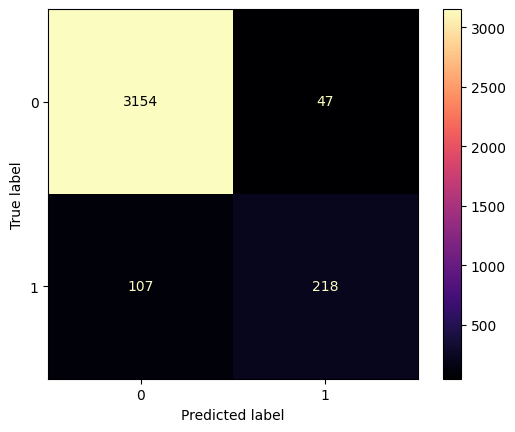

In [70]:

ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred,cmap='magma')

# Creating a K-Nearest Neighbors Model

In [71]:
parameters_knn = { 'n_neighbors': range(1, 51), 'weights':['uniform', 'distance'] }

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [73]:
grid_search_knn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid= parameters_knn,scoring='accuracy')

In [74]:
grid_search_knn.fit(x_train_array, y_train_array)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [75]:
knn_clf = grid_search_knn.best_estimator_
y_test_pred_knn = knn_clf.predict(x_test_array)

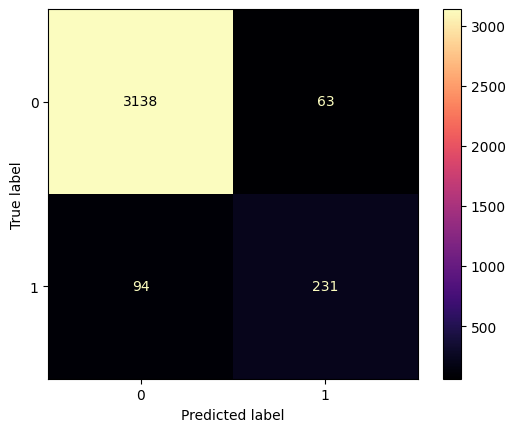

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_knn,cmap ='magma')

In [77]:
print(classification_report(y_test_array, y_test_pred_knn, target_names= ['Not Purchased', 'Purchased']))

               precision    recall  f1-score   support

Not Purchased       0.97      0.98      0.98      3201
    Purchased       0.79      0.71      0.75       325

     accuracy                           0.96      3526
    macro avg       0.88      0.85      0.86      3526
 weighted avg       0.95      0.96      0.95      3526



# Creating a Support Vector Machines Model

In [83]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC

In [98]:
scaling = MinMaxScaler(feature_range=(-1,1))
x_train_rescaled = scaling.fit_transform(x_train_array)
x_test_rescaled = scaling.transform(x_test_array)

In [99]:
#enc_t = LabelEncoder()

In [100]:
#y_train_transf = enc_t.fit_transform(y_train_array)
#y_test_transf = enc_t.transform(y_test_array)

In [112]:
parameters_svm = [
    { 'kernel': ['linear'],'C': [1, 10]},
    {'kernel': ['poly'], 'C': [1,10]}, 
    {'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'C': [1,10]}
    ]

In [113]:
grid_search_svm = GridSearchCV(estimator= SVC(), param_grid= parameters_svm, scoring= 'accuracy')

In [114]:
grid_search_svm.fit(x_train_rescaled, y_train_array)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10], 'kernel': ['linear']},
                         {'C': [1, 10], 'kernel': ['poly']},
                         {'C': [1, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [115]:
grid_search_svm.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10], 'kernel': ['linear']},
                         {'C': [1, 10], 'kernel': ['poly']},
                         {'C': [1, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']}],
             scoring='accuracy')>

In [119]:
grid_search_svm.best_estimator_

SVC(C=10, kernel='poly')

In [117]:
svm_clf = grid_search_svm.best_estimator_
y_test_pred_svm = svm_clf.predict(x_test_rescaled)

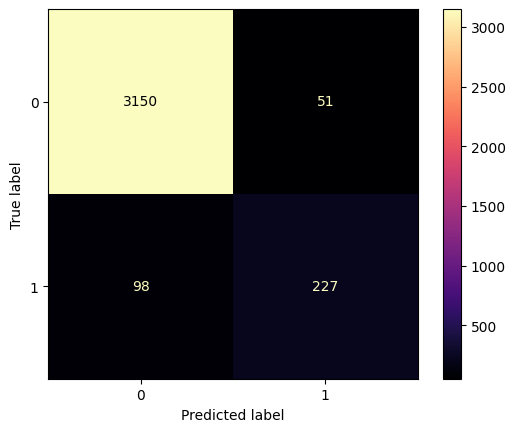

In [118]:
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_svm, labels = svm_clf.classes_ ,cmap='magma')

In [120]:
print(classification_report(y_test_array, y_test_pred_svm, target_names= ['Not purchased', 'purchased']))

               precision    recall  f1-score   support

Not purchased       0.97      0.98      0.98      3201
    purchased       0.82      0.70      0.75       325

     accuracy                           0.96      3526
    macro avg       0.89      0.84      0.86      3526
 weighted avg       0.96      0.96      0.96      3526



# Creating a Decision Trees Model

In [124]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [128]:
parameters_dt = [{'ccp_alpha':[0, 0.001, 0.002, 0.003, 0.004, 0.005]}]

In [ ]:
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters_dt, scoring= 'accuracy')

In [ ]:
grid_search_dt.fit(x_train_array, y_train_array)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]}],
             scoring='accuracy')

In [131]:
grid_search_dt.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]}],
             scoring='accuracy')>

In [150]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001)

In [133]:
clf_dt = grid_search_dt.best_estimator_

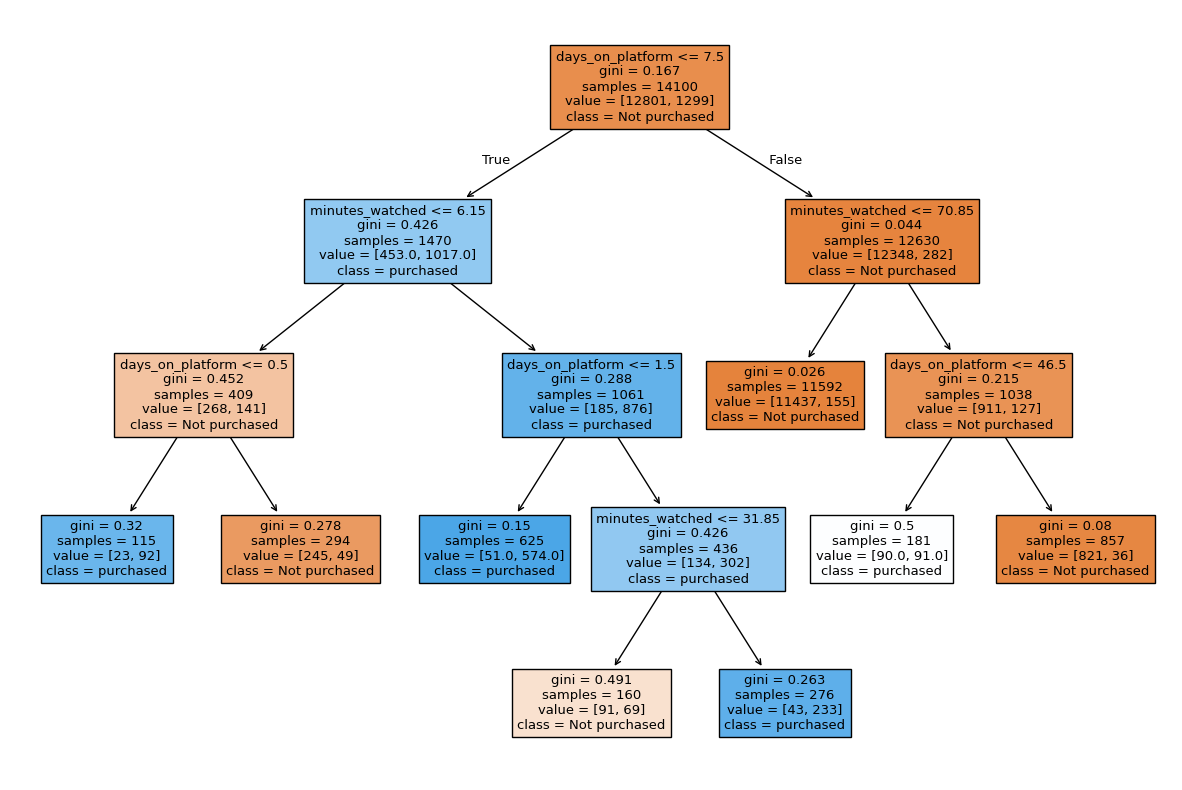

In [ ]:
plt.figure(figsize=(15,10))

plot_tree(clf_dt, filled=True, 
          feature_names= ['days_on_platform', 'minutes_watched', 'courses_started', 'minutes_spent_on_exams', 'student_country_enc'], 
          class_names=['Not purchased', 'purchased']
          )

plt.show()


In [152]:
y_test_pred_dt = clf_dt.predict(x_test_array)

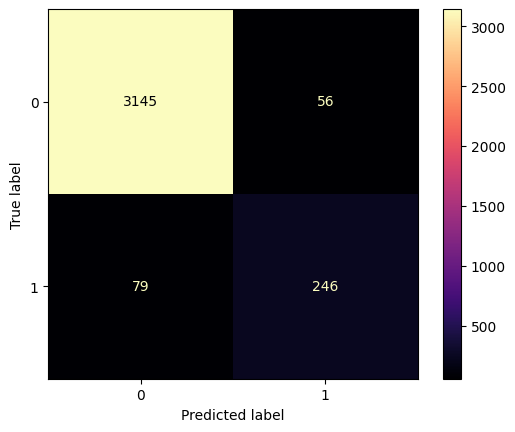

In [153]:
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_dt,cmap='magma')

In [156]:
print(classification_report(y_test_array, y_test_pred_dt, target_names=['Not purchased', 'purchased']))

               precision    recall  f1-score   support

Not purchased       0.98      0.98      0.98      3201
    purchased       0.81      0.76      0.78       325

     accuracy                           0.96      3526
    macro avg       0.90      0.87      0.88      3526
 weighted avg       0.96      0.96      0.96      3526



# Creating a Random Forests Model